In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# ! unzip '/content/drive/MyDrive/SIH/archive (2).zip'

In [50]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential, Model
from keras.layers import Dense
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             accuracy_score)

import cv2
import pandas as pd
# Base Libraries
from tensorflow.keras.applications import  VGG19
import numpy as np
import os

from sklearn.model_selection import train_test_split

In [51]:
cat = ['Psoriasis pictures Lichen Planus and related diseases',
 'vitiligo',
 'Acne and Rosacea Photos',
 'Normal',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Eczema Photos']

In [52]:
def data_dictionary():
    path_train="/content/skin/train/"
    path_test="/content/skin/test/"
    list_train=cat

    list_train1=cat
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            if img_path_train!="/content/skin/train/Normal/34.avif":
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k)
        k+=1

    k = 0
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [53]:
train = data_dictionary()
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  9120 non-null   object
 1   target      9120 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.6+ KB


In [54]:
import cv2
images=[]
label=[]

for img_path in train["image_path"]:
    try:
        if img_path != "/content/skin/train/Normal/34.avif":
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (180, 180))
                images.append(img)
            else:
                print(f"Unable to read image: {img_path}")
    except Exception as e:
        print(f"Error processing image {img_path}: {str(e)}")

In [55]:
label=train['target']


In [56]:
import numpy as np
import pandas as pd
data=np.array(images)
label=np.array(label)

In [57]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3))

In [58]:
for layer in vgg_model.layers :
    layer.trainable = False

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [60]:
model=Sequential([

                    Dense(200,activation='relu'),
                    Dense(170,activation='relu'),
                    Dense(6,activation='softmax'),

])

In [61]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')

In [62]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
import numpy as np
unique_labels = np.unique(label)
print("Unique labels:", unique_labels)

Unique labels: [0 1 2 3 4 5]


In [64]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [65]:
x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.33,random_state = 42)
print(x_train.shape)
# let's make all layers non-trainable
for layer in vgg_model.layers :
    layer.trainable = False
features_train=vgg_model.predict(x_train)
features_test=vgg_model.predict(x_test)
test_data = x_test
print(features_train.shape)
num_train=x_train.shape[0]
num_test=x_test.shape[0]
print(num_train)
print(num_test)
x_test=features_test.reshape(num_test,-1)
x_train=features_train.reshape(num_train,-1)
print(x_train.shape)
print(x_test.shape)


(6110, 180, 180, 3)
95/95 [==============================] - 9s 100ms/step
(6110, 5, 5, 512)
6110
3010
(6110, 12800)
(3010, 12800)


In [66]:
history = model.fit(x_train, y_train, epochs=30, callbacks=[mcp_save])

Epoch 1/30
188/191 [============================>.] - ETA: 0s - loss: 1.9839 - accuracy: 0.5665

191/191 [==============================] - 2s 4ms/step - loss: 1.9684 - accuracy: 0.5669
Epoch 2/30
180/191 [===========================>..] - ETA: 0s - loss: 0.7771 - accuracy: 0.7252

191/191 [==============================] - 1s 4ms/step - loss: 0.7743 - accuracy: 0.7252
Epoch 3/30
188/191 [============================>.] - ETA: 0s - loss: 0.5155 - accuracy: 0.8196

191/191 [==============================] - 1s 4ms/step - loss: 0.5178 - accuracy: 0.8198
Epoch 4/30
188/191 [============================>.] - ETA: 0s - loss: 0.3485 - accuracy: 0.8737

191/191 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8736
Epoch 5/30
190/191 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.9074

191/191 [==============================] - 1s 4ms/step - loss: 0.2843 - accuracy: 0.9072
Epoch 6/30
189/191 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9248

191/191 [==============================] - 1s 6ms/step - loss: 0.2669 - accuracy: 0.9241
Epoch 7/30
191/191 [==============================] - ETA: 0s - loss: 0.2454 - accuracy: 0.9386

191/191 [==============================] - 1s 5ms/step - loss: 0.2454 - accuracy: 0.9386
Epoch 8/30
183/191 [===========================>..] - ETA: 0s - loss: 0.3233 - accuracy: 0.9271

191/191 [==============================] - 1s 5ms/step - loss: 0.3206 - accuracy: 0.9270
Epoch 9/30
183/191 [===========================>..] - ETA: 0s - loss: 0.2546 - accuracy: 0.9407

191/191 [==============================] - 1s 5ms/step - loss: 0.2606 - accuracy: 0.9396
Epoch 10/30
187/191 [============================>.] - ETA: 0s - loss: 0.1706 - accuracy: 0.9525

191/191 [==============================] - 1s 4ms/step - loss: 0.1683 - accuracy: 0.9534
Epoch 11/30
189/191 [============================>.] - ETA: 0s - loss: 0.1459 - accuracy: 0.9649

191/191 [==============================] - 1s 4ms/step - loss: 0.1447 - accuracy: 0.9651
Epoch 12/30
185/191 [============================>.] - ETA: 0s - loss: 0.1230 - accuracy: 0.9704

191/191 [==============================] - 1s 4ms/step - loss: 0.1263 - accuracy: 0.9691
Epoch 13/30
186/191 [============================>.] - ETA: 0s - loss: 0.1532 - accuracy: 0.9671

191/191 [==============================] - 1s 4ms/step - loss: 0.1534 - accuracy: 0.9671
Epoch 14/30
183/191 [===========================>..] - ETA: 0s - loss: 0.1875 - accuracy: 0.9585

191/191 [==============================] - 1s 4ms/step - loss: 0.1954 - accuracy: 0.9571
Epoch 15/30
189/191 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9616

191/191 [==============================] - 1s 4ms/step - loss: 0.2005 - accuracy: 0.9617
Epoch 16/30
191/191 [==============================] - ETA: 0s - loss: 0.1444 - accuracy: 0.9697

191/191 [==============================] - 1s 4ms/step - loss: 0.1444 - accuracy: 0.9697
Epoch 17/30
190/191 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9822

191/191 [==============================] - 1s 4ms/step - loss: 0.0782 - accuracy: 0.9820
Epoch 18/30
185/191 [============================>.] - ETA: 0s - loss: 0.0791 - accuracy: 0.9809

191/191 [==============================] - 1s 4ms/step - loss: 0.0932 - accuracy: 0.9799
Epoch 19/30
190/191 [============================>.] - ETA: 0s - loss: 0.0863 - accuracy: 0.9806

191/191 [==============================] - 1s 4ms/step - loss: 0.0880 - accuracy: 0.9804
Epoch 20/30
184/191 [===========================>..] - ETA: 0s - loss: 0.0440 - accuracy: 0.9895

191/191 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9890
Epoch 21/30
188/191 [============================>.] - ETA: 0s - loss: 0.0912 - accuracy: 0.9772

191/191 [==============================] - 1s 4ms/step - loss: 0.0946 - accuracy: 0.9769
Epoch 22/30
183/191 [===========================>..] - ETA: 0s - loss: 0.1072 - accuracy: 0.9746

191/191 [==============================] - 1s 5ms/step - loss: 0.1151 - accuracy: 0.9748
Epoch 23/30
189/191 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9846

191/191 [==============================] - 1s 5ms/step - loss: 0.0984 - accuracy: 0.9846
Epoch 24/30
186/191 [============================>.] - ETA: 0s - loss: 0.1076 - accuracy: 0.9750

191/191 [==============================] - 1s 5ms/step - loss: 0.1065 - accuracy: 0.9751
Epoch 25/30
186/191 [============================>.] - ETA: 0s - loss: 0.1261 - accuracy: 0.9751

191/191 [==============================] - 1s 6ms/step - loss: 0.1251 - accuracy: 0.9756
Epoch 26/30
187/191 [============================>.] - ETA: 0s - loss: 0.1202 - accuracy: 0.9771

191/191 [==============================] - 1s 4ms/step - loss: 0.1230 - accuracy: 0.9771
Epoch 27/30
190/191 [============================>.] - ETA: 0s - loss: 0.1079 - accuracy: 0.9775

191/191 [==============================] - 1s 4ms/step - loss: 0.1074 - accuracy: 0.9776
Epoch 28/30
190/191 [============================>.] - ETA: 0s - loss: 0.0929 - accuracy: 0.9826

191/191 [==============================] - 1s 4ms/step - loss: 0.0929 - accuracy: 0.9825
Epoch 29/30
182/191 [===========================>..] - ETA: 0s - loss: 0.0565 - accuracy: 0.9894

191/191 [==============================] - 1s 4ms/step - loss: 0.0609 - accuracy: 0.9889
Epoch 30/30
191/191 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.9869

191/191 [==============================] - 1s 4ms/step - loss: 0.0835 - accuracy: 0.9869


In [67]:
model.save('skin_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
y_pred=model.predict(x_test)

95/95 [==============================] - 0s 3ms/step


In [69]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([2, 2, 1, ..., 5, 4, 1])

In [70]:
y_test=np.argmax(y_test, axis=1)

In [71]:
y_test

array([2, 2, 1, ..., 4, 4, 1])

In [72]:
len(y_test)

3010

In [73]:
true_count = 0
for i in range(len(y_pred2)):
  if y_test[i] == y_pred2[i]:
    true_count = true_count + 1

true_count

2259

In [74]:
true_count/len(y_test)

0.7504983388704319

In [75]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)


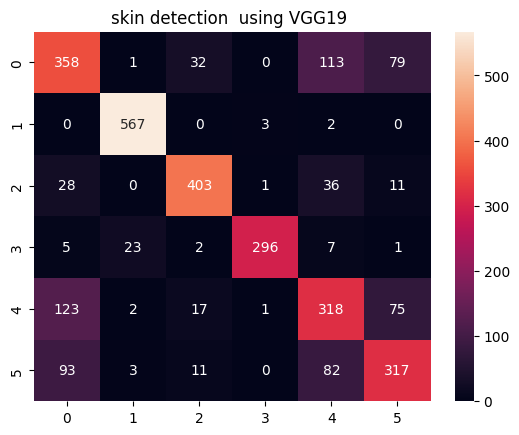

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
plt.title("skin detection  using VGG19 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

In [77]:
test_image=[]

import tensorflow as tf
import numpy as np
import cv2
imgpath1 = "/content/skin/train/Tinea Ringworm Candidiasis and other Fungal Infections/13perleche0102061.jpg"

def predict_skin_disease(image_path):
    # Define list of class names
    class_names = ['Psoriasis pictures Lichen Planus and related diseases','vitiligo','Acne and Rosacea Photos','Normal','Tinea Ringworm Candidiasis and other Fungal Infections','Eczema Photos']
    print(class_names)

    # Load saved model
    model = tf.keras.models.load_model('skin_model.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (180, 180))
    test_image.append(img)
    img = np.array(test_image)
    print(img.shape)
    features_test1 = vgg_model.predict(img)
    num_test=img.shape[0]
    img = features_test1.reshape(num_test, -1)

    # Make prediction on preprocessed image

    pred = model.predict(img)
    pred2 = np.argmax(pred, axis=1)
    print(pred2)

    predicted_class_name = class_names[pred2[0]]

    return predicted_class_name

print(predict_skin_disease(imgpath1))

['Psoriasis pictures Lichen Planus and related diseases', 'vitiligo', 'Acne and Rosacea Photos', 'Normal', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Eczema Photos']
(1, 180, 180, 3)
1/1 [==============================] - 0s 58ms/step
[4]
Tinea Ringworm Candidiasis and other Fungal Infections
